# Estadítisca descriptiva

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../data/interim/loan_cleaned.csv")
data.head()

C:\Users\aoroz\AppData\Local\Temp\ipykernel_19104\1135337138.py:1: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/interim/loan_cleaned.csv")


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,desc
0,5000.0,5000.0,4975.0,36,10.65,162.87,b,b,NaN,10.0,...,171.62,NaN,2016-01-01,0.0,individual,0.0,NaN,NaN,NaN,borrower added need upgrade business technologies
1,2500.0,2500.0,2500.0,60,15.27,59.83,c,c,ryder,1.0,...,119.66,NaN,2013-09-01,0.0,individual,0.0,NaN,NaN,NaN,borrower added plan use money finance motorcyc...
2,2400.0,2400.0,2400.0,36,15.96,84.33,c,c,NaN,10.0,...,649.91,NaN,2016-01-01,0.0,individual,0.0,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36,13.49,339.31,c,c,air resources board,10.0,...,357.48,NaN,2015-01-01,0.0,individual,0.0,NaN,NaN,NaN,borrower added pay property tax borrow friend ...
4,3000.0,3000.0,3000.0,60,12.69,67.79,b,b,university medical group,1.0,...,67.79,2016-02-01,2016-01-01,0.0,individual,0.0,NaN,NaN,NaN,borrower added plan combining three large inte...


## Análisis general para variables numéricas

In [4]:
numerical_df = data.select_dtypes(include=['number'])
print(numerical_df.describe().sort_values(by='std', axis=1, ascending=False))

        tot_cur_bal    annual_inc  total_rev_hi_lim     revol_bal  \
count  8.171030e+05  8.873750e+05      8.171030e+05  8.873790e+05   
mean   1.394582e+05  7.502759e+04      3.206862e+04  1.692079e+04   
std    1.537500e+05  6.469830e+04      3.749826e+04  2.242679e+04   
min    0.000000e+00  0.000000e+00      0.000000e+00  0.000000e+00   
25%    2.985300e+04  4.500000e+04      1.390000e+04  6.443000e+03   
50%    8.055900e+04  6.500000e+04      2.370000e+04  1.187500e+04   
75%    2.082050e+05  9.000000e+04      3.980000e+04  2.082900e+04   
max    8.000078e+06  9.500000e+06      9.999999e+06  2.904836e+06   

       tot_coll_amt      out_prncp  out_prncp_inv  funded_amnt_inv  \
count  8.171030e+05  887379.000000  887379.000000    887379.000000   
mean   2.257026e+02    8403.124852    8399.713242     14702.464383   
std    1.031137e+04    8493.450269    8489.997617      8442.106732   
min    0.000000e+00       0.000000       0.000000         0.000000   
25%    0.000000e+00       0.

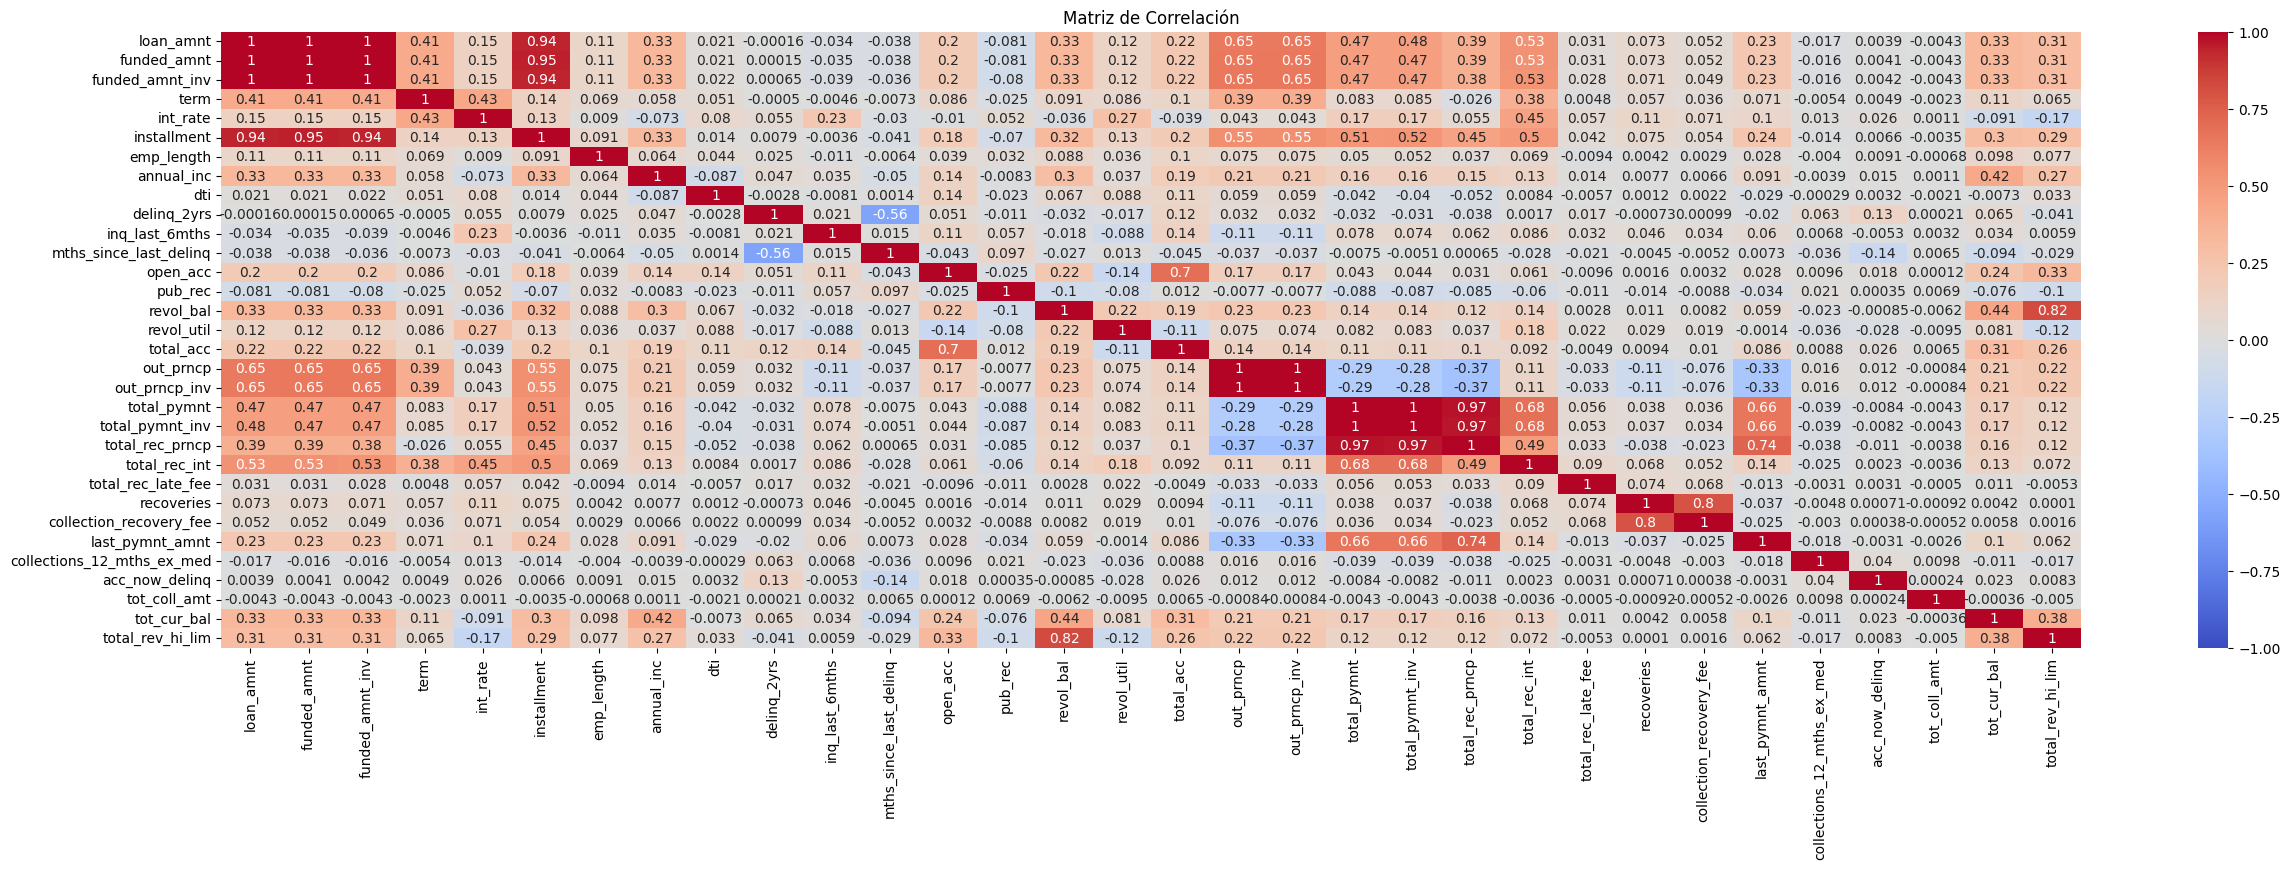

In [5]:
correlation_matrix = numerical_df.corr()

# Grafica la matriz de correlación
plt.figure(figsize=(30, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

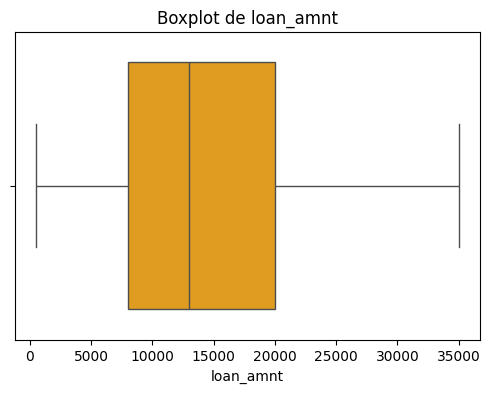

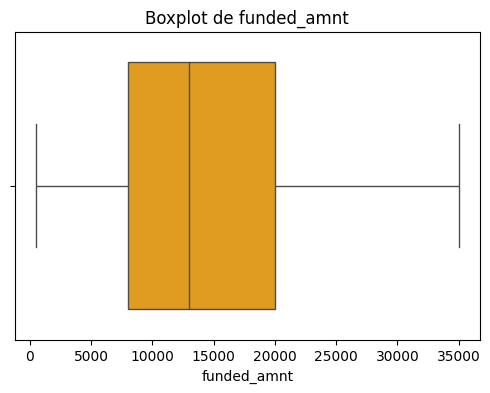

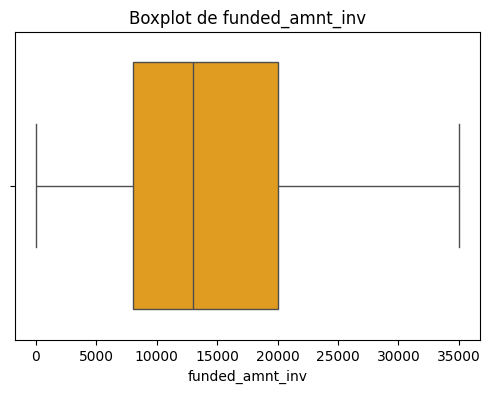

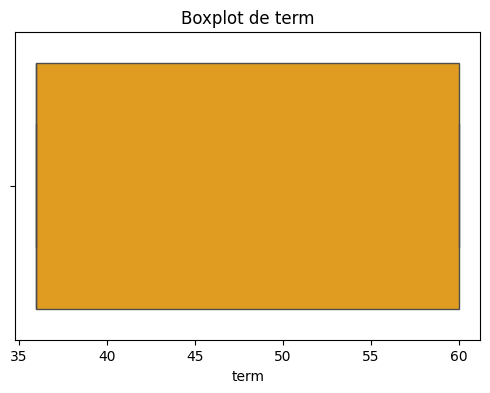

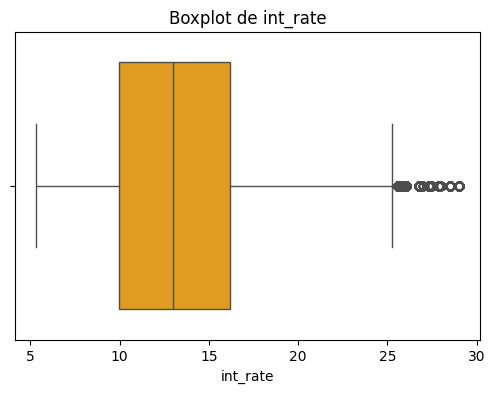

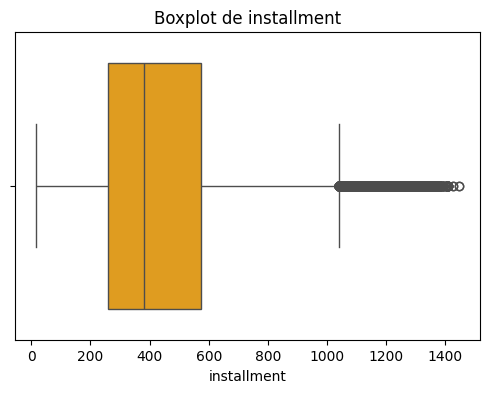

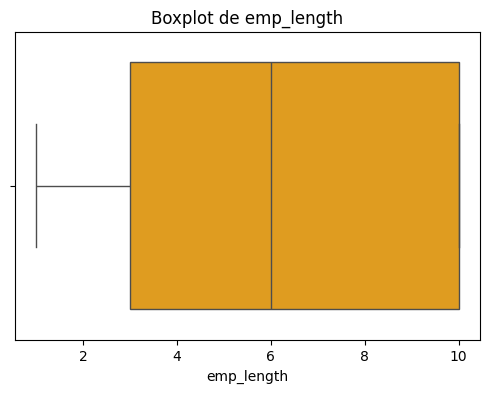

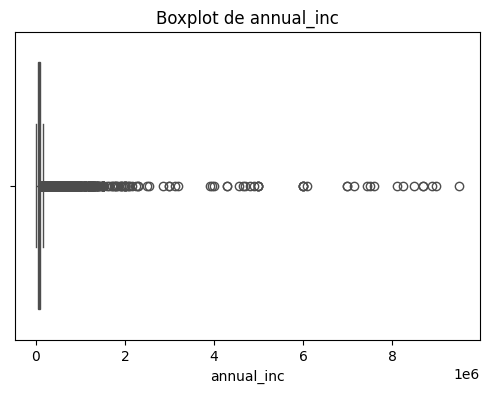

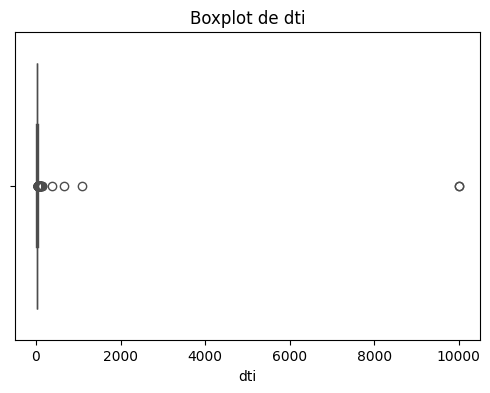

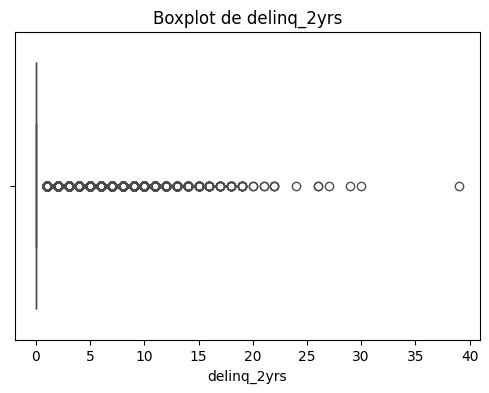

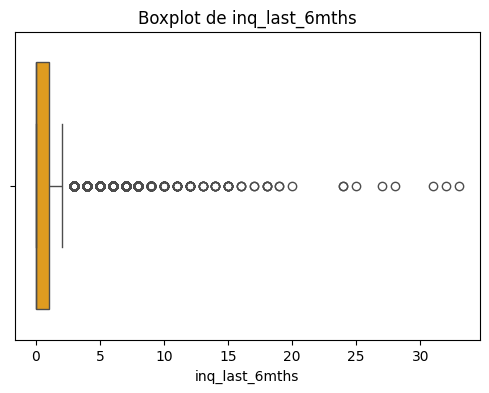

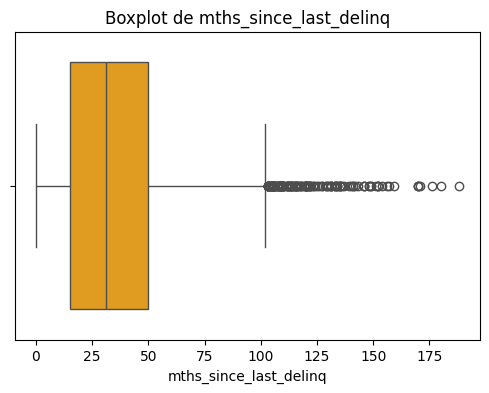

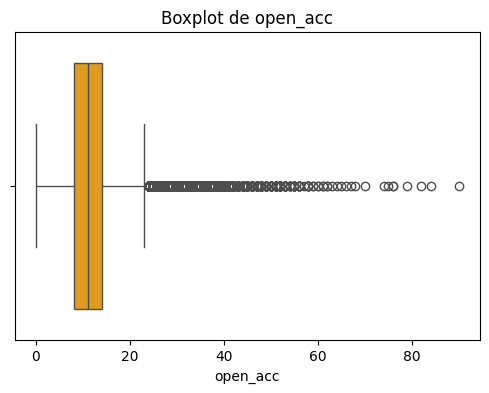

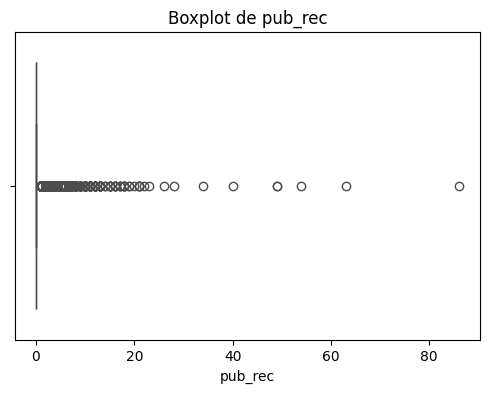

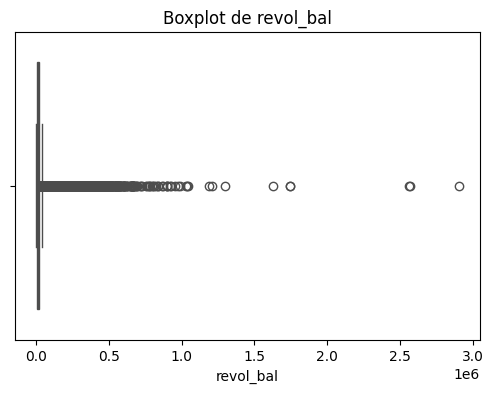

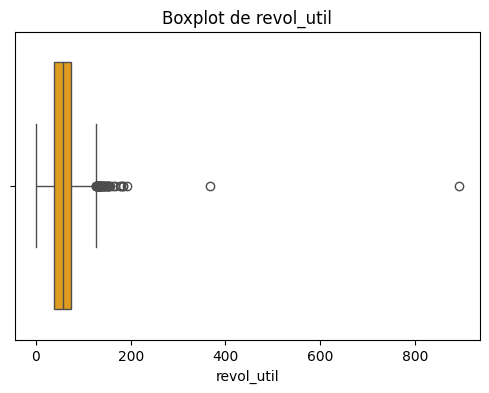

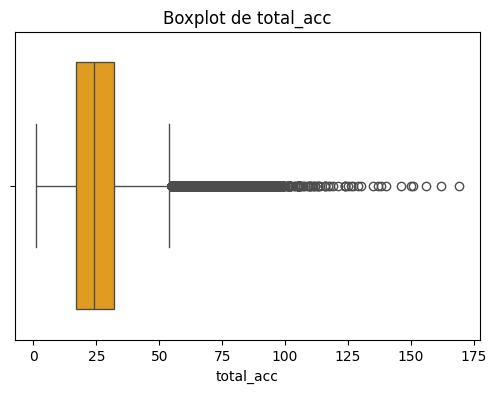

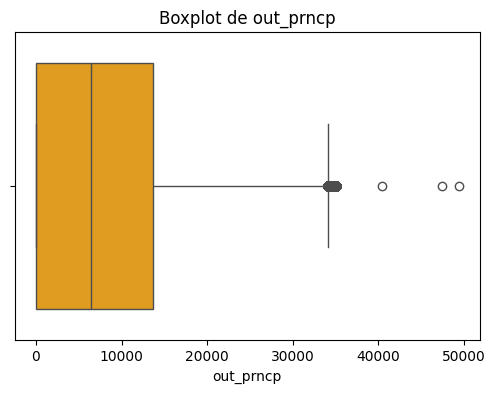

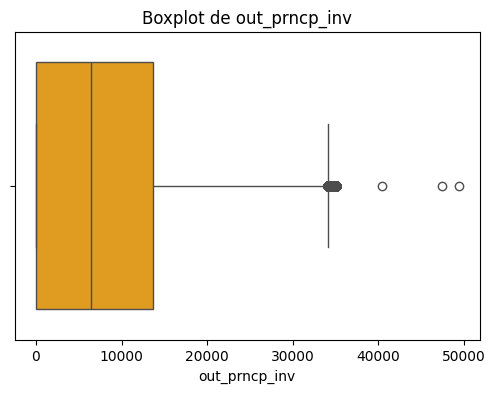

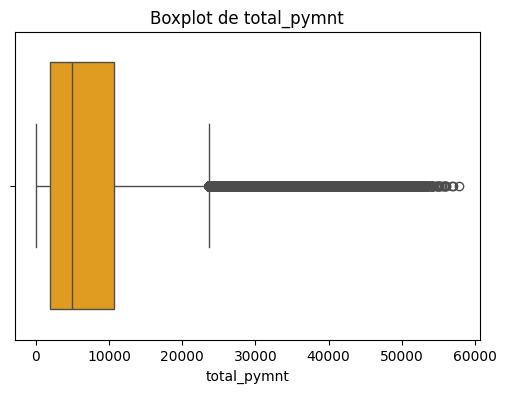

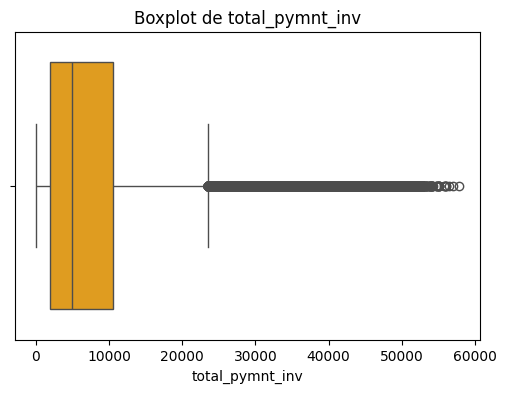

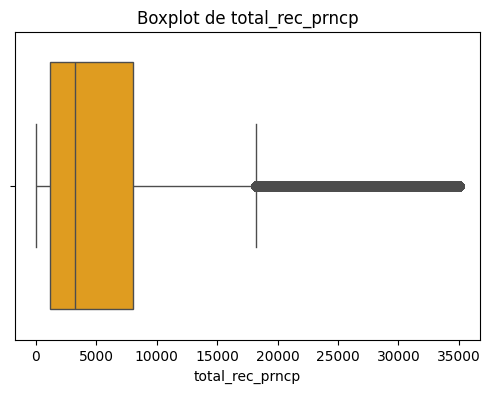

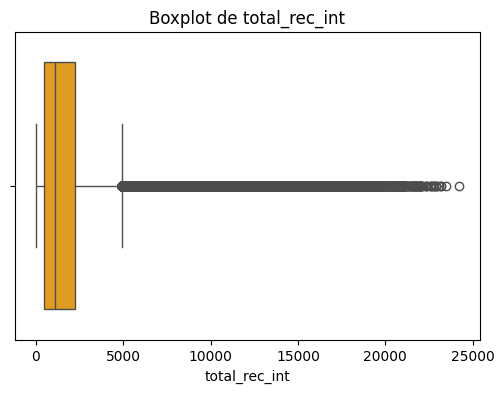

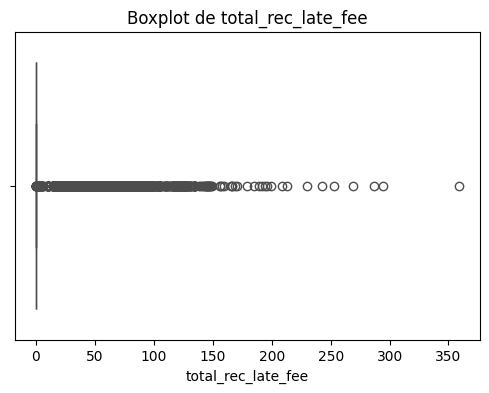

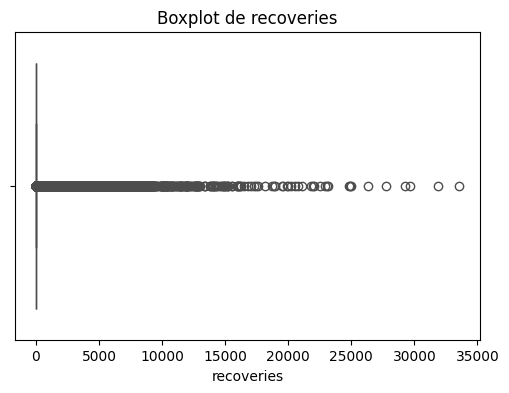

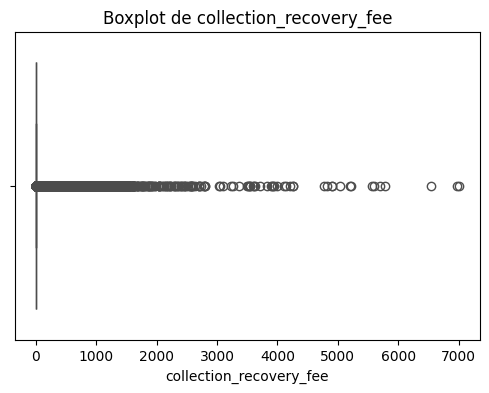

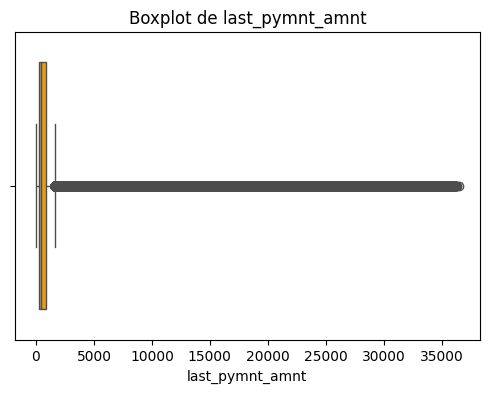

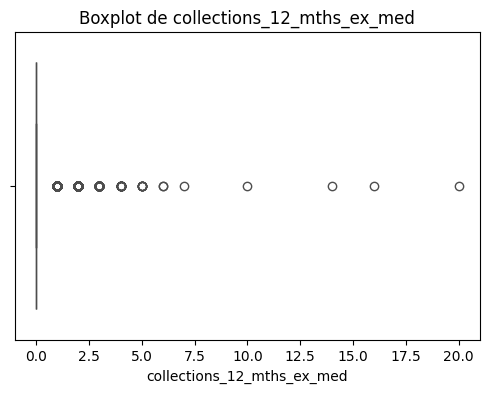

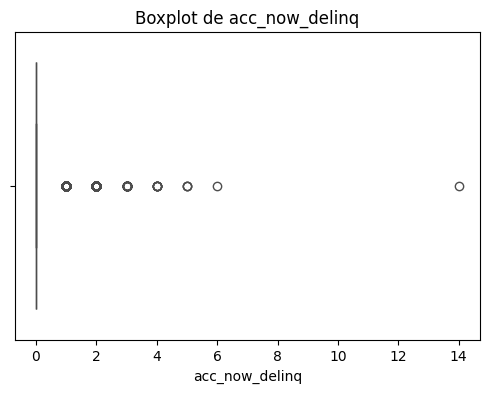

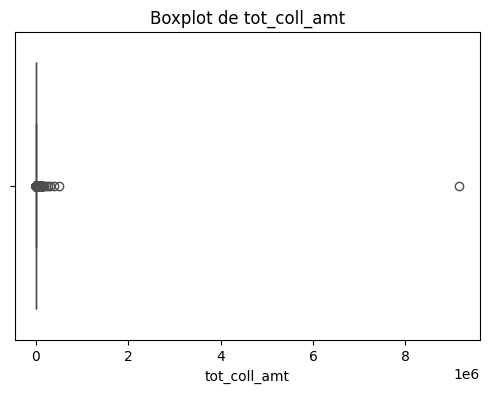

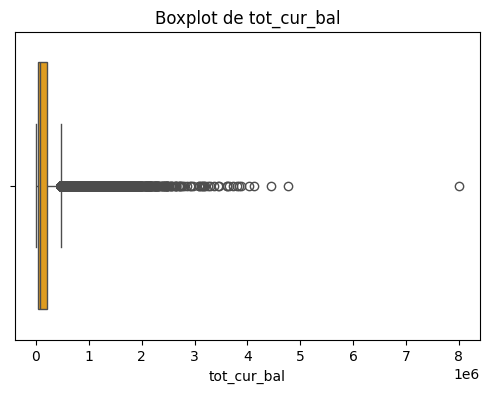

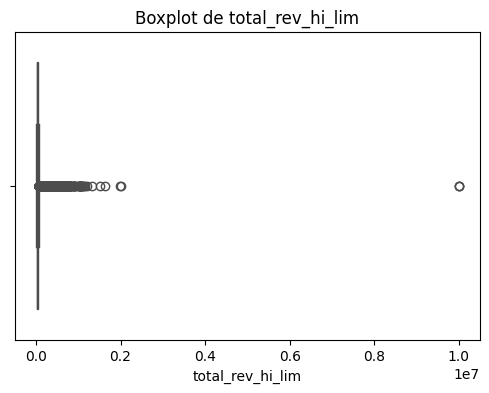

In [14]:
for col in numerical_df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=numerical_df[col], color='orange')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()


## Análisis general para variables categóricas

In [6]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Frecuencias para {col}:")
    print(data[col].value_counts())
    print("\n")


Frecuencias para grade:
grade
b    254535
c    245860
e     70705
f     23046
g      5489
Name: count, dtype: int64


Frecuencias para sub_grade:
sub_grade
b    254535
c    245860
e     70705
f     23046
g      5489
Name: count, dtype: int64


Frecuencias para emp_title:
emp_title
teacher                        17018
manager                        16701
owner                           8794
registered nurse                8061
supervisor                      7616
                               ...  
tecknitian                         1
chin restaurant                    1
premium mortgage consultant        1
connection inspection              1
sr computer tech                   1
Name: count, Length: 234273, dtype: int64


Frecuencias para home_ownership:
home_ownership
mortgage    443557
rent        356117
none            50
Name: count, dtype: int64


Frecuencias para verification_status:
verification_status
verified           557821
source verified    329558
Name: count, dtype: int6

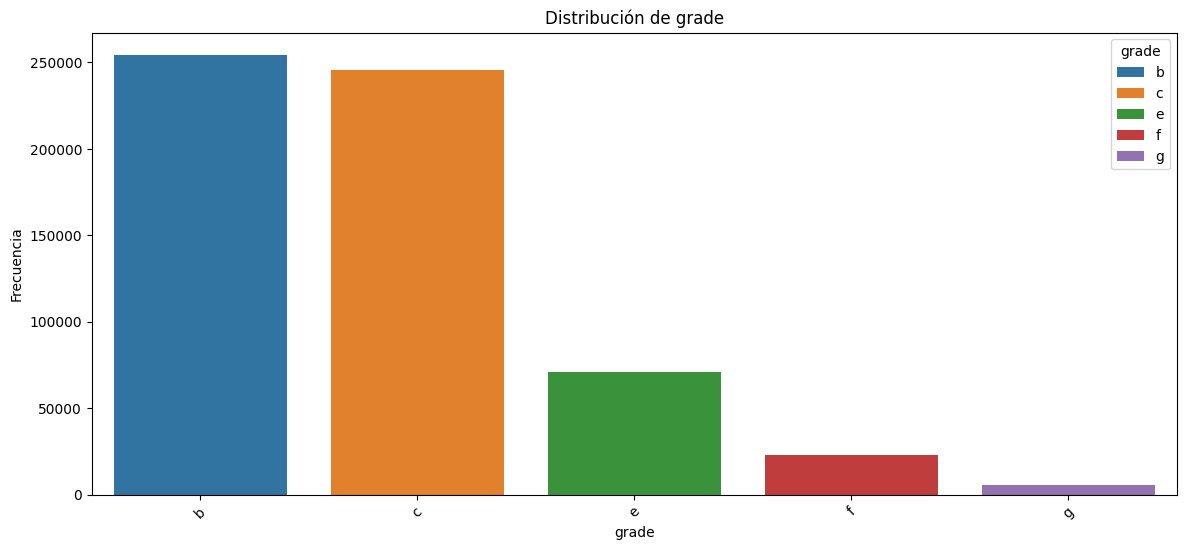

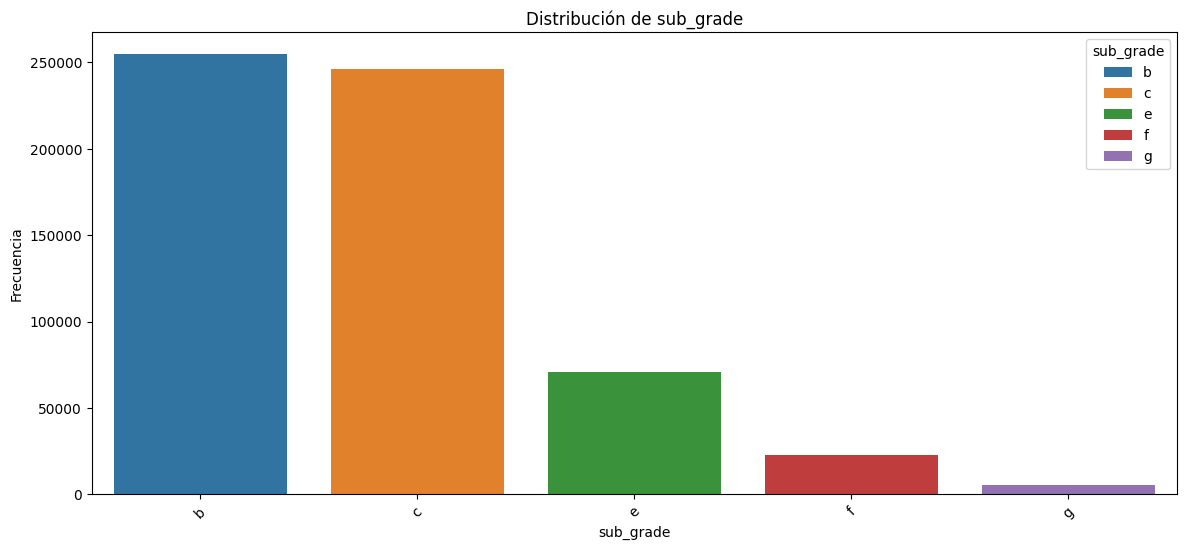

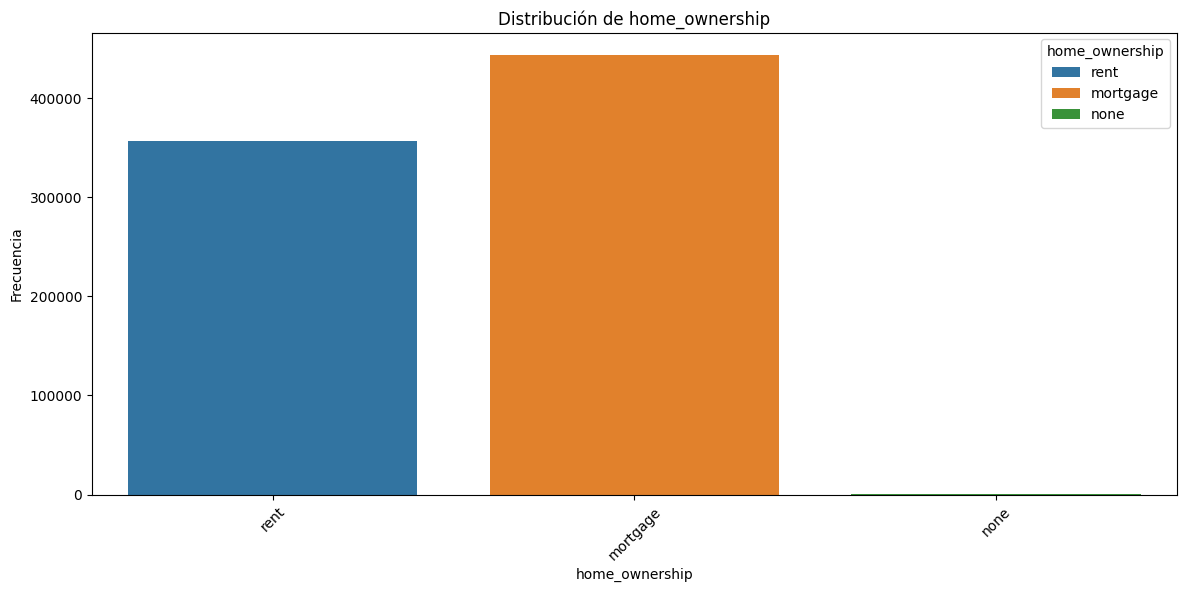

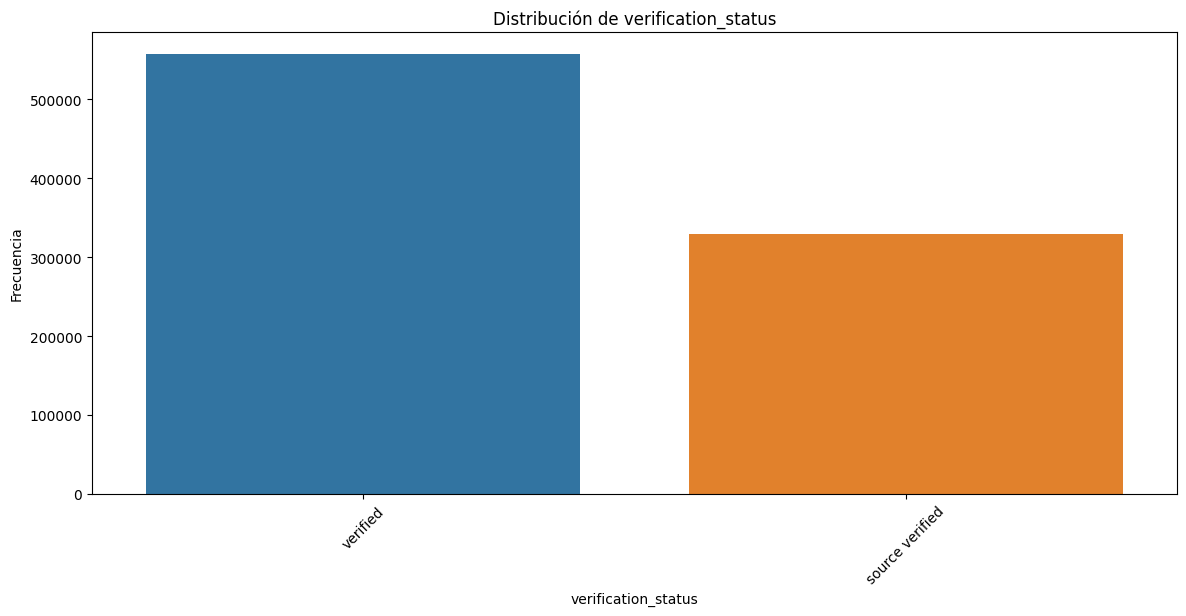

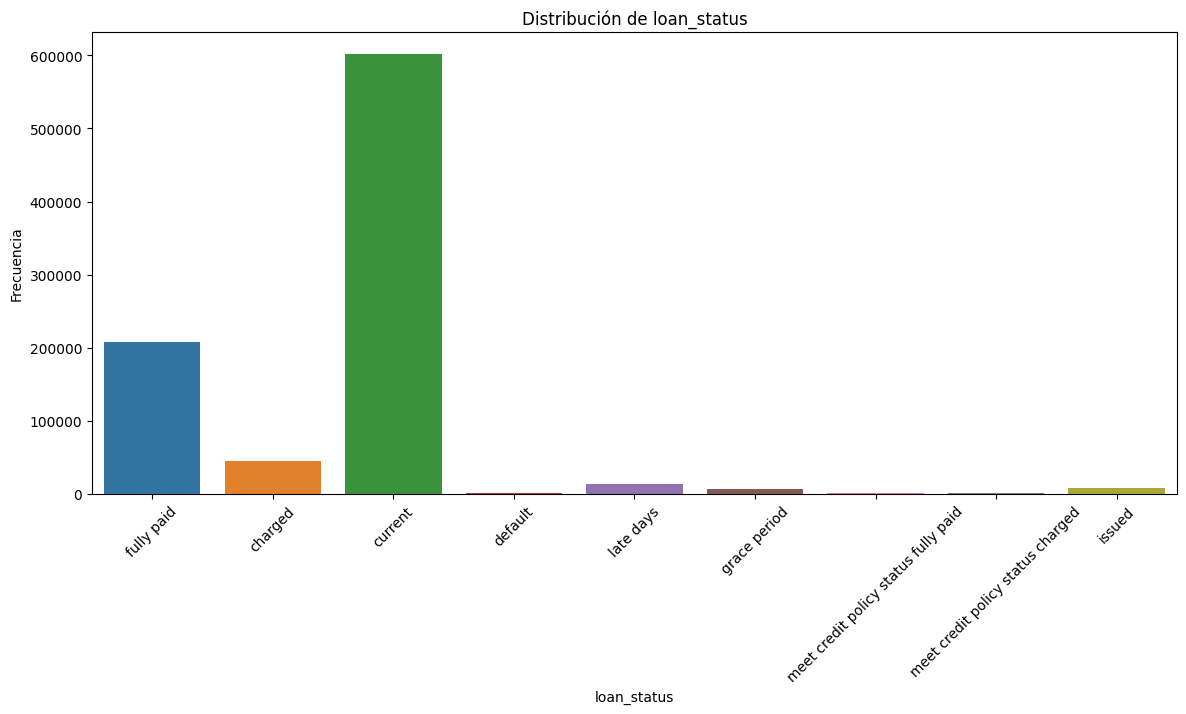

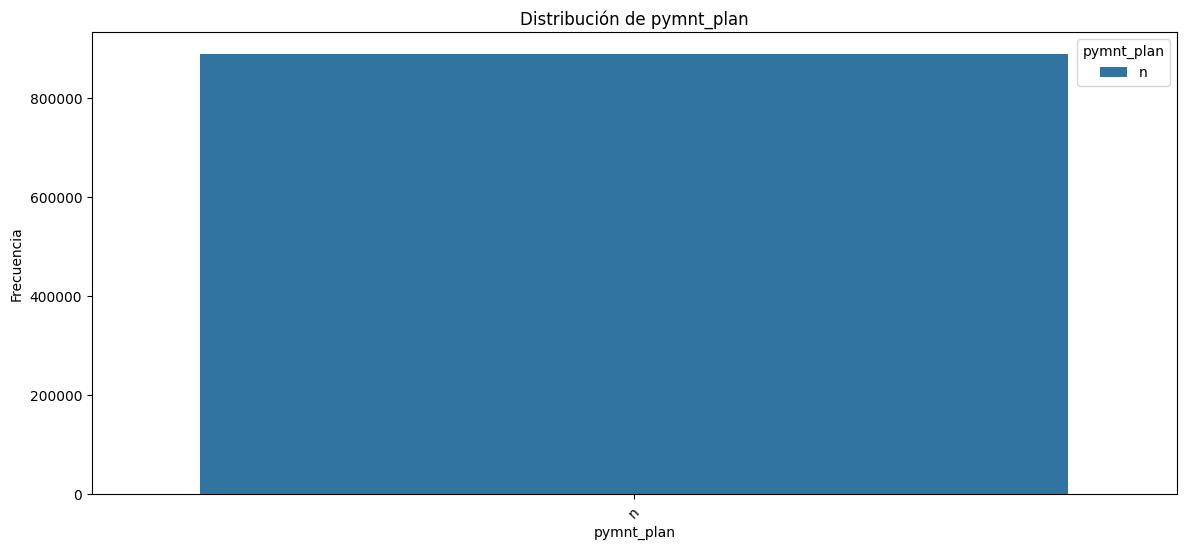

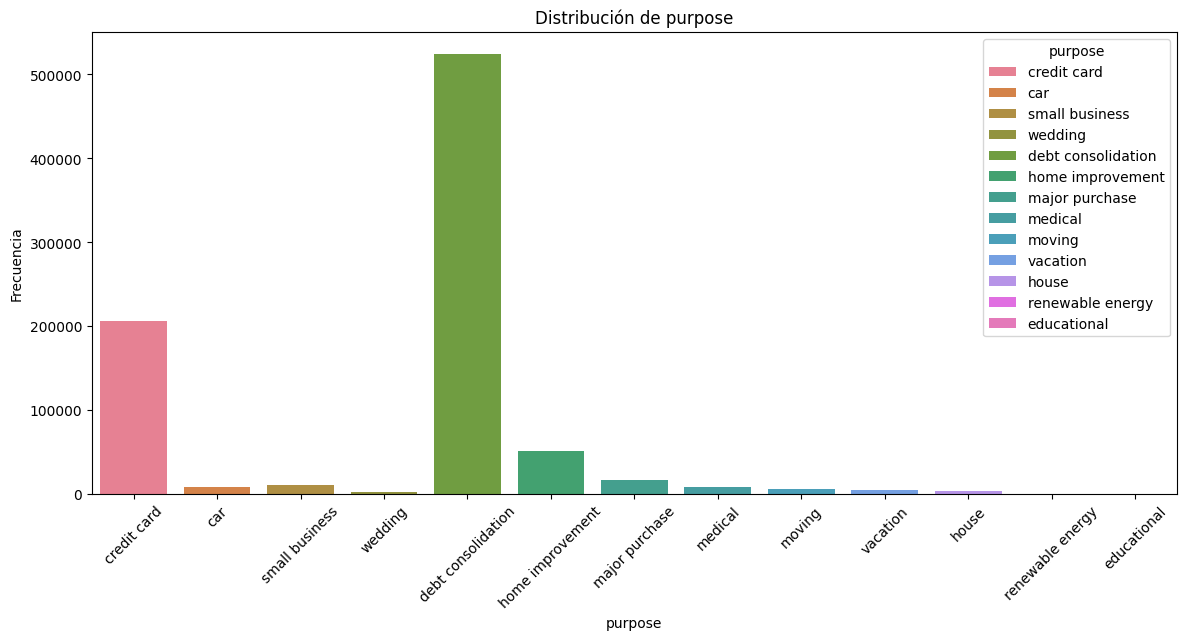

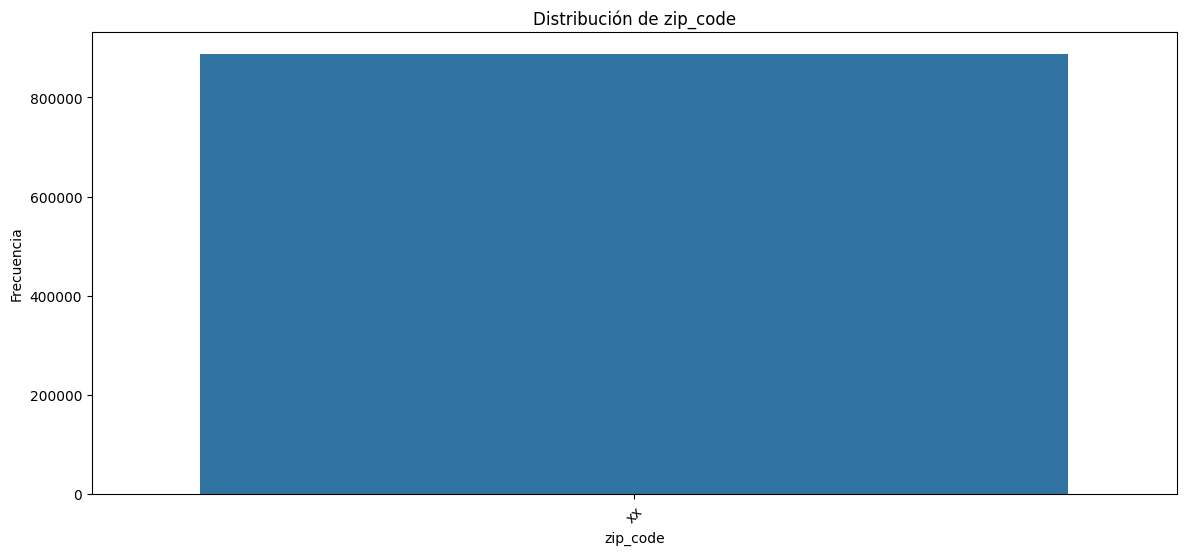

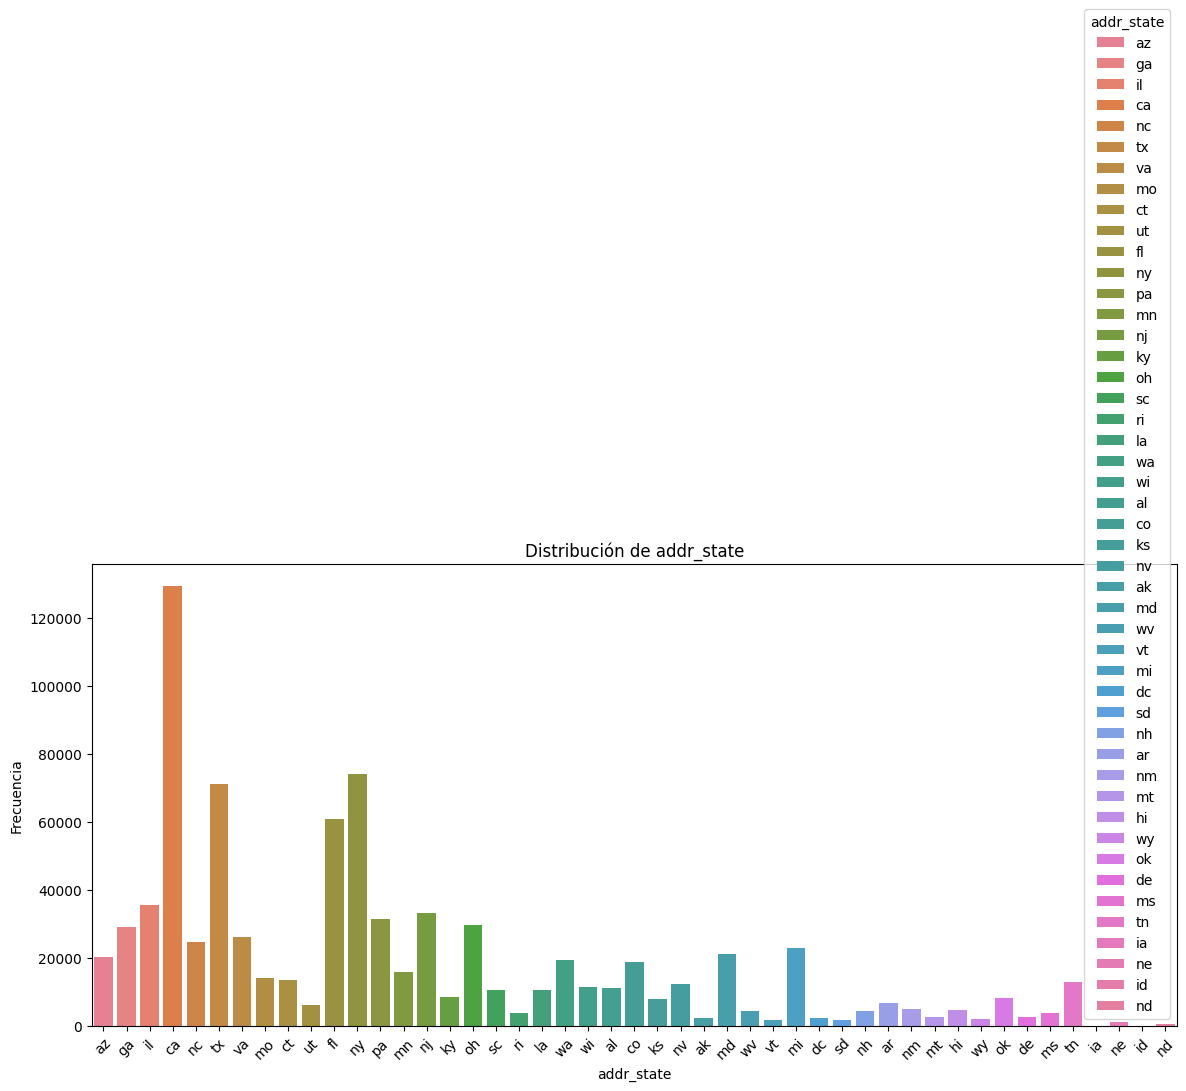

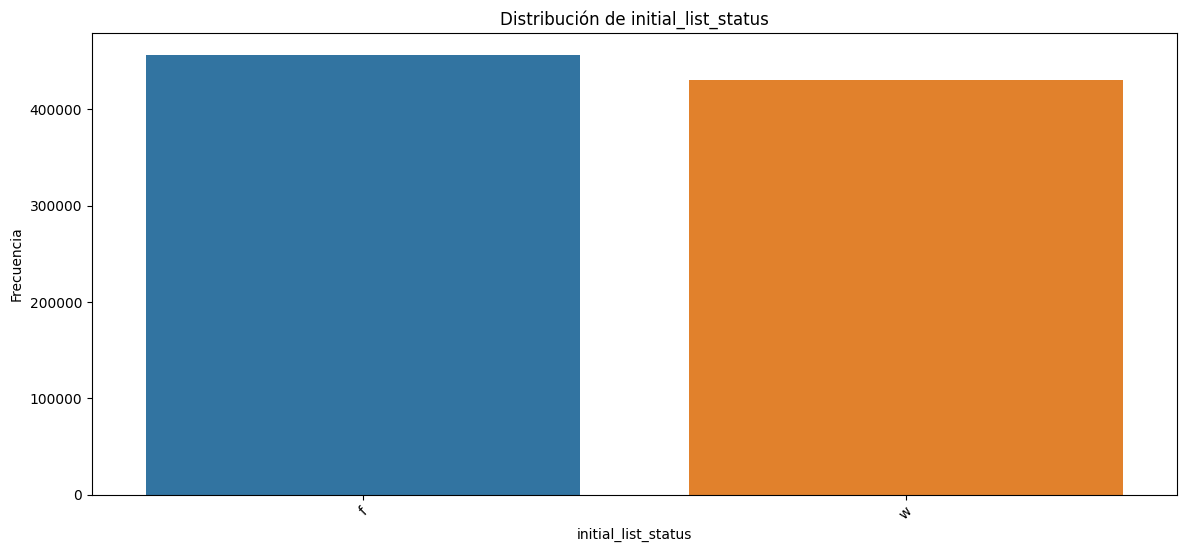

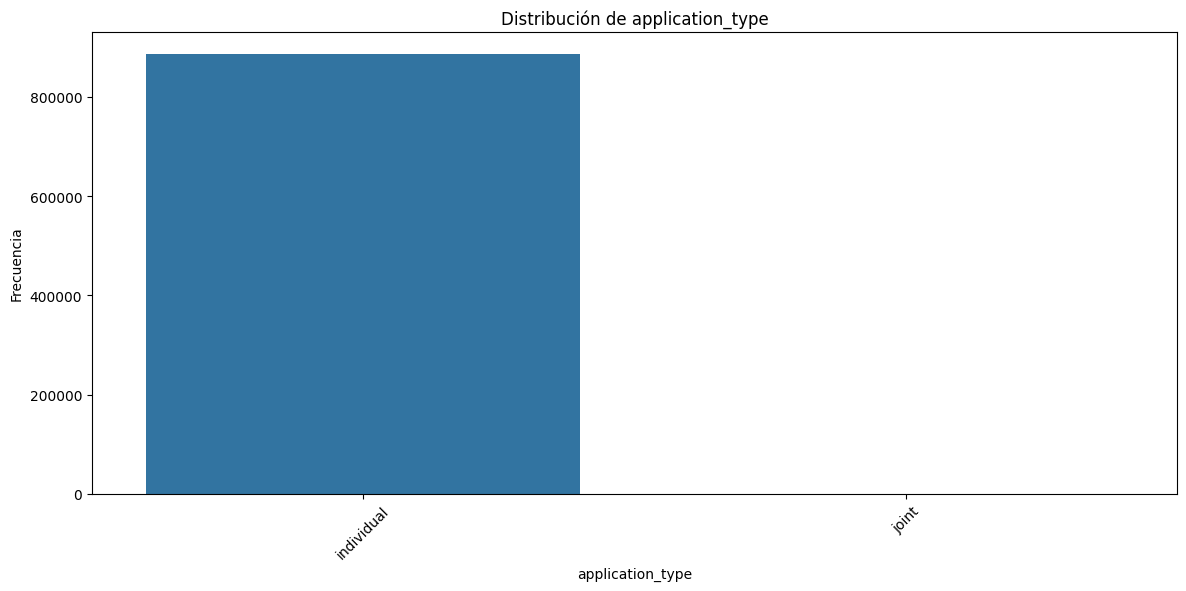

In [12]:
cant_categorias = 50

categorical_columns = data.select_dtypes(include=['object']).columns

filtered_columns = [col for col in categorical_columns if data[col].nunique() <= cant_categorias]

for col in filtered_columns:
    plt.figure(figsize=(14, 6))  # Tamaño de la figura
    sns.countplot(x=col, data=data, hue=col)  # Gráfico de barras
    plt.title(f'Distribución de {col}')  # Título del gráfico
    plt.xlabel(col)  # Etiqueta en el eje X
    plt.ylabel('Frecuencia')  # Etiqueta en el eje Y
    plt.xticks(rotation=45)  # Girar las etiquetas del eje X si es necesario
    plt.show()



[]

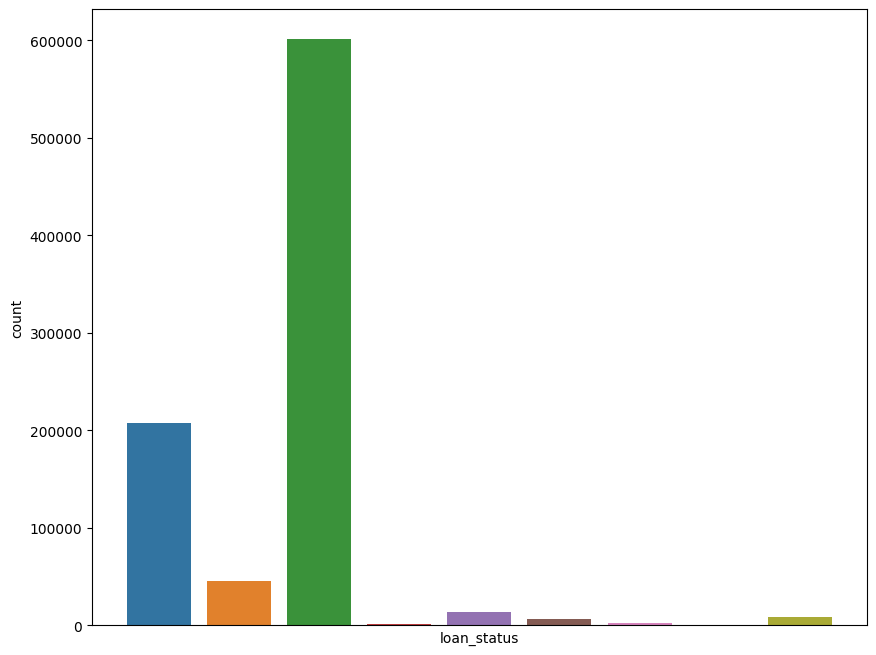

In [15]:
plt.figure(figsize=(10, 8))
sns.countplot(data, x="loan_status", hue="loan_status")
plt.xticks([])
plt.plot()

[]

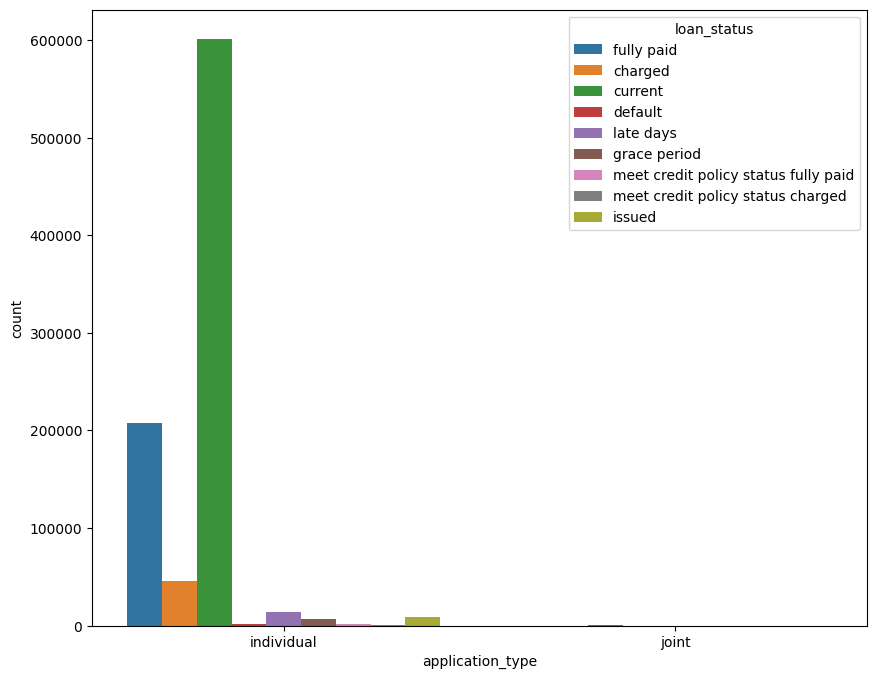

In [6]:
plt.figure(figsize=(10, 8))
sns.countplot(data, x="application_type", hue="loan_status")
plt.plot()

[]

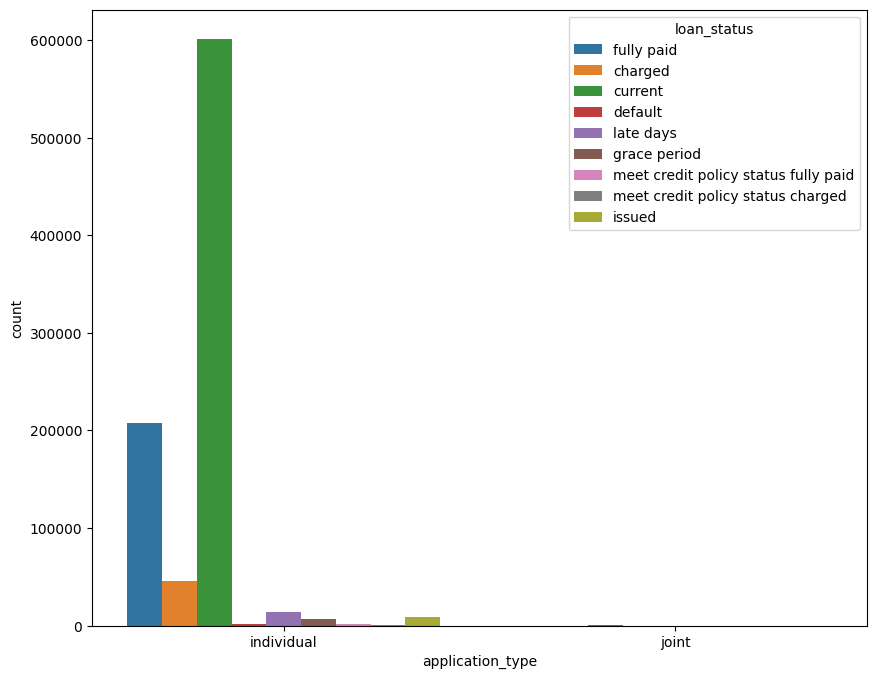

In [13]:
plt.figure(figsize=(10, 8))
sns.countplot(data, x="application_type", hue="loan_status")
plt.plot()